# Week 3 - Training

Now that we have the shape of our general purpose curve fitting function, how do we train them?

* What is training?
* Gradient descent
* Stochastic Gradient descent
* Train/test split
* Learning curves
* Hyperparameters 
    * Numebr of layers
    * Size of each layer
* Dropout
* L1/L2 regularization    
* Train our first network with Keras

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras as K

E0000 00:00:1739305550.792194      79 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739305550.796361      79 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## What is Training

In the last lesson, we talked about the structure of neural networks as mathematical functions.
We learned that neural networks satisfy the universal approximation theorem, meaning that with a good choice of parameters they can approximate _any_ function.
This week, we will discuss _how_ we can find the best values for the weights and biases so that the neural network fits whatever data we like.
The process of finding the best parameters is called **training.**

## 
Gradient Descent

In unit 1, we introduced the idea of gradient descent. Let's review the algorithm here:

1. Randomly initialize the weights or the network.
2. Compute the loss
3. Compute the gradient of MSE with respect to the weights.
4. Update the weights by subtracting a small multiple of the gradient.
5. Repeat steps 2-4 either a set number of times, or until convergence.

## Training a Neural Network with Keras

The nice thing about using Tensorflow and Keras (or other frameworks such as Pytorch) for neural networks is that we can take advantage of _automatic differentiation_.
In other words, Tensorflow calculates the gradients for us! Let's take a look at the basic neural network from the last lesson and try to train it using gradient descent.

In [88]:
model = K.Sequential()

model.add(K.layers.Input((1, ), name='input_layer'))
model.add(K.layers.Dense(3, activation='relu', name='hidden_layer'))
model.add(K.layers.Dense(1, activation='linear', name='output_layer'))

model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)            │ (None, 3)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10 (40.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

Unlike the network last week, we used the _sigmoid_ function as our activation function instead of the step function.
This is because the step function does not work with gradient descent since it does not have a defined derivative at it's point of discontunity.
The sigmoid serves as a good smooth approximation of the step function, so we will use that instead.

In [89]:
model.compile(loss='mse', optimizer='sgd')

In [85]:
# Training the network using some data

X = np.linspace(-np.pi, np.pi, 100)
y = np.sin(X) + np.random.normal(0, 0.05, size=100)

X = X

X = X.reshape(-1, 1) ## Required to make X a matrix

model.fit(X, y, epochs=10**3, verbose=0)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


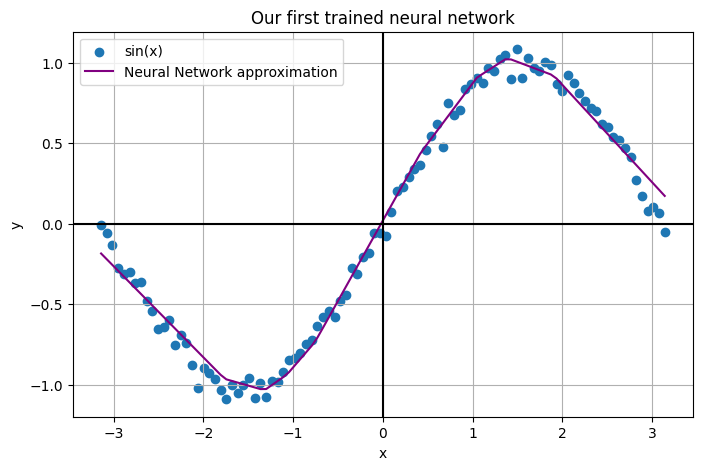

In [87]:
# Compare the model with the actual function:

y_hat = model.predict(X)


plt.figure(figsize=(8, 5))

plt.scatter(X, y, label='sin(x)')
plt.plot(X, y_hat, label='Neural Network approximation', c='purple')

plt.title("Our first trained neural network")
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(c='k')
plt.axvline(c='k')
plt.grid()
plt.legend()

Not very good at all! Let's improve things by increasing the number of neurons in our hidden layer.

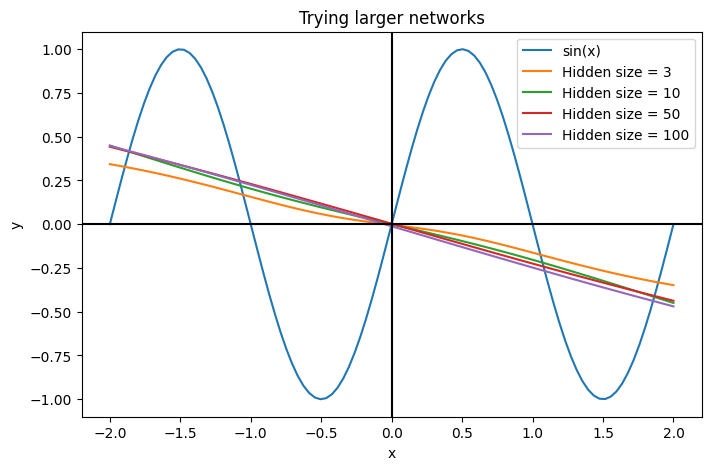

In [6]:
plt.figure(figsize=(8, 5))

plt.plot(X, y, label='sin(x)')


for hidden_size in [3, 10, 50, 100]:
    model = K.Sequential()
    
    model.add(K.layers.Input((1, ), name='input_layer'))
    model.add(K.layers.Dense(hidden_size, activation='tanh', name='hidden_layer'))
    model.add(K.layers.Dense(1, activation='linear', name='output_layer'))

    model.compile(loss='mse', optimizer='sgd')

    # Don't show output for every training...
    model.fit(X, y, epochs=30, batch_size=10, verbose=0)

    y_hat = model.predict(X, verbose=0)
    
    plt.plot(X, y_hat, label=f'Hidden size = {hidden_size}')


plt.title("Trying larger networks")
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(c='k')
plt.axvline(c='k')
plt.legend()

# Homework Questions

1. Describe the difference between standard gradient descent and stochastic gradient descent.
Explain the advantages of using stochastic gradient descent.

2. Explain what the purpose of a loss function is. Describe two loss functions we learned about and what the use cases would be for each.

3. Use the Pandas library to load the given dataset. Use the `train_test_split` function to split the data into training and testing datasets with 80% for training and 20% for testing.

4. Use the Keras library's `Sequential` model to build a simple neural network with one hidden layer with 100 neurons. Train the model to predict the column `___NAME___`. Evaluate the neural network on the test data you created in question 2.

5. Use learning curves to determine if the neural network from question \#4 is underfitting or overfitting. Explain your reasoning.

6. Try to improve the neural network you trained in question \#4 above by including regularization, dropout, or by varying the number or size of layers.